In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
def load_data(train_batch_size, test_batch_size):
    # Fetch MNIST dataset without explicitly mentioning train=True or False multiple times
    def get_data(train):
        return datasets.MNIST('data', train=train, download=False, 
                transform=transforms.ToTensor())
    
    # Create DataLoader for training and test datasets
    train_loader = torch.utils.data.DataLoader(
        get_data(train=True), 
        batch_size=train_batch_size, 
        shuffle=True
    )
    
    test_loader = torch.utils.data.DataLoader(
        get_data(train=False), 
        batch_size=test_batch_size, 
        shuffle=True
    )
    
    return train_loader, test_loader


In [5]:
class BaseModel(nn.Module):
    def __init__(self, fc1_out, fc2_out):
        super().__init__()
        self.fc1 = nn.Linear(784, fc1_out)
        self.fc2 = nn.Linear(fc1_out, fc2_out)
        self.fc3 = nn.Linear(fc2_out, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model1(BaseModel):
    def __init__(self):
        super().__init__(5, 9)

class Model2(BaseModel):
    def __init__(self):
        super().__init__(25, 50)

class Model3(BaseModel):
    def __init__(self):
        super().__init__(50, 100)

class Model4(BaseModel):
    def __init__(self):
        super().__init__(60, 120)

class Model5(BaseModel):
    def __init__(self):
        super().__init__(100, 200)

class Model6(BaseModel):
    def __init__(self):
        super().__init__(150, 300)

class Model7(BaseModel):
    def __init__(self):
        super().__init__(200, 400)

class Model8(BaseModel):
    def __init__(self):
        super().__init__(250, 500)

class Model9(BaseModel):
    def __init__(self):
        super().__init__(280, 560)

class Model10(BaseModel):
    def __init__(self):
        super().__init__(350, 600)


In [6]:
train_batch_size = 20
test_batch_size = 40
train_loader, test_loader = load_data(train_batch_size, test_batch_size)
epochs = 10

In [7]:
def calc_params(model):
    total_params = 0
    for p in model.parameters():
        total_params += p.numel()
    return total_params

def define_optimizer(model):
    optimizer = optim.Adam([param for param in model.parameters()], lr=0.0001)
    return optimizer


In [8]:
def train(model, optimizer, train_loader, loss_fn):
    model.train()
    
    for batch_idx, batch_data in enumerate(train_loader):
        data, target = batch_data[0], batch_data[1]
        data = data.view(-1, 784)  # Flattening the input

        # Resetting gradients
        optimizer.zero_grad()

        # Forward pass and compute loss
        output = model(data)
        loss = loss_fn(output, target)

        # Backpropagation and optimizer step
        loss.backward()
        optimizer.step()


In [9]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [10]:
def compute(model, optimizer):
    loss_fn = torch.nn.CrossEntropyLoss()

    # Loop through epochs
    for epoch in range(1, epochs + 1):
        # Perform training for the current epoch
        train(model, optimizer, train_loader, loss_fn)

        # Calculate losses and accuracy
        train_loss, train_acc = calculate_loss(model, train_loader, loss_fn)
        test_loss, test_acc = calculate_loss(model, test_loader, loss_fn)

        # Append metrics to arrays
        loss_train_arr.append(train_loss)
        loss_test_arr.append(test_loss)
        train_acc_arr.append(train_acc)
        test_acc_arr.append(test_acc)

        # Record model parameters for each epoch
        param_arr.append(calc_params(model))

        # Print the training and testing results for the current epoch
        print(f"Epoch {epoch}:")
        print(f"Model Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.3f}")
        print(f"Model Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.3f}")



In [11]:
loss_train_arr = []
loss_test_arr = []
param_arr = []
test_acc_arr = []
train_acc_arr = []

In [12]:
def train_and_evaluate(models):
    for idx, model in enumerate(models, start=1):
        print(f"Model {idx} parameters: {calc_params(model)}")
        
        # Set the random seed for each model
        torch.manual_seed(1)
        
        # Define the optimizer and compute metrics for the model
        optimizer = define_optimizer(model)
        compute(model, optimizer)

# Instantiate models
models = [Model1(), Model2(), Model3(), Model4(), Model5(), Model6(), Model7(), Model8(), Model9(), Model10()]

# Train and evaluate all models
train_and_evaluate(models)


Model 1 parameters: 4079
Epoch 1:
Model Train Loss: 1.3560, Train Accuracy: 0.550
Model Test Loss: 1.3469, Test Accuracy: 0.551
Epoch 2:
Model Train Loss: 0.9255, Train Accuracy: 0.716
Model Test Loss: 0.9097, Test Accuracy: 0.719
Epoch 3:
Model Train Loss: 0.7648, Train Accuracy: 0.768
Model Test Loss: 0.7457, Test Accuracy: 0.771
Epoch 4:
Model Train Loss: 0.6798, Train Accuracy: 0.796
Model Test Loss: 0.6596, Test Accuracy: 0.800
Epoch 5:
Model Train Loss: 0.6226, Train Accuracy: 0.813
Model Test Loss: 0.6012, Test Accuracy: 0.820
Epoch 6:
Model Train Loss: 0.5808, Train Accuracy: 0.826
Model Test Loss: 0.5586, Test Accuracy: 0.832
Epoch 7:
Model Train Loss: 0.5475, Train Accuracy: 0.836
Model Test Loss: 0.5273, Test Accuracy: 0.840
Epoch 8:
Model Train Loss: 0.5200, Train Accuracy: 0.845
Model Test Loss: 0.5005, Test Accuracy: 0.848
Epoch 9:
Model Train Loss: 0.4963, Train Accuracy: 0.853
Model Test Loss: 0.4778, Test Accuracy: 0.857
Epoch 10:
Model Train Loss: 0.4751, Train Accura

In [13]:
temp_1 = []
for i in loss_train_arr:
    temp_1.append(i.data.numpy().tolist())

temp_2 = []
for i in loss_test_arr:
    temp_2.append(i.data.numpy().tolist())

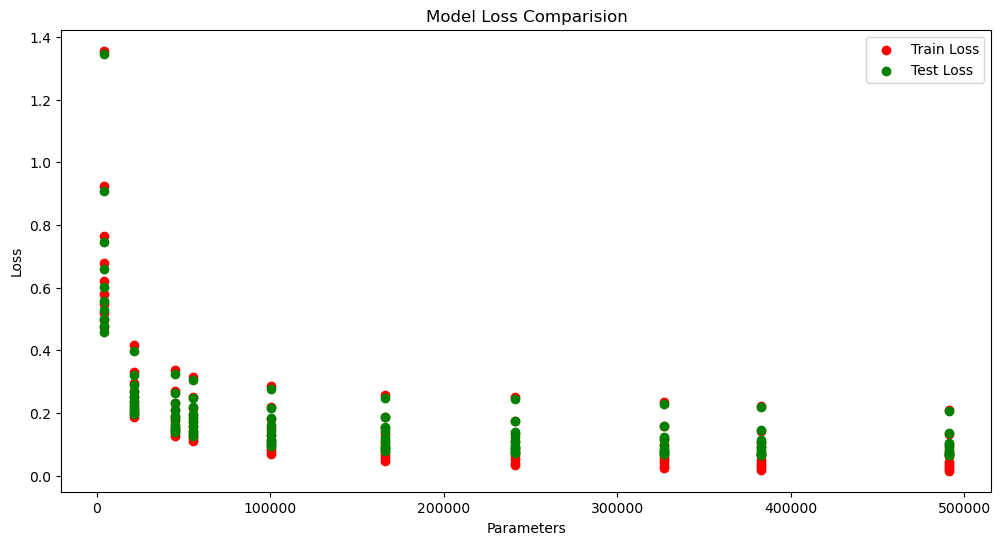

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(param_arr, temp_1, color = "r")
plt.scatter(param_arr, temp_2, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.show()

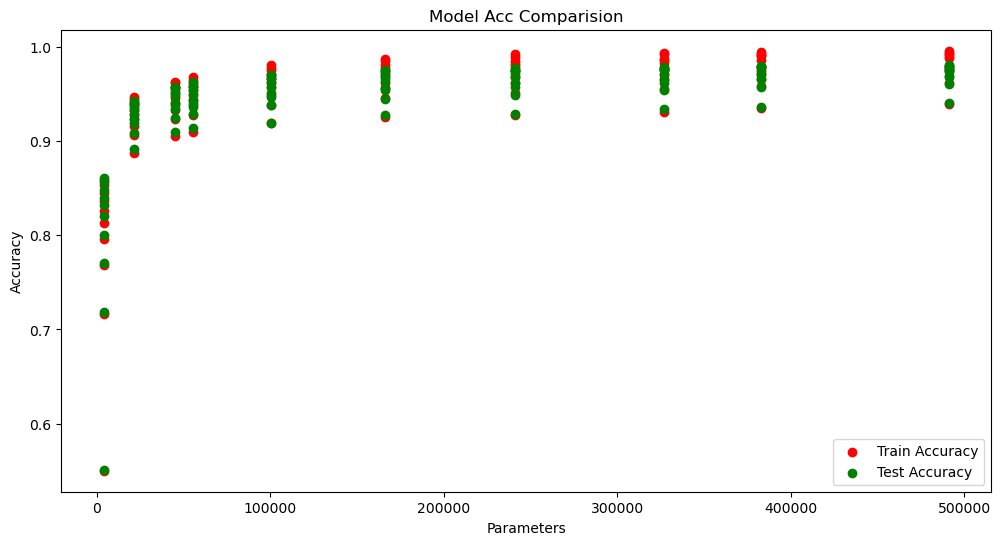

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(param_arr, train_acc_arr, color = "r")
plt.scatter(param_arr, test_acc_arr, color = "g")
plt.title('Model Acc Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.show()